In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.read_csv('/Users/pratiksha/Documents/Internships/Prodigy Infotech/Task 4 Dataset - Twitter Sentiment Analysis/Twitter - validation.csv')
print(df)

     Number          Application        Type  \
0      3364             Facebook  Irrelevant   
1       352               Amazon     Neutral   
2      8312            Microsoft    Negative   
3      4371                CS-GO    Negative   
4      4433               Google     Neutral   
..      ...                  ...         ...   
995    4891  GrandTheftAuto(GTA)  Irrelevant   
996    4359                CS-GO  Irrelevant   
997    2652          Borderlands    Positive   
998    8069            Microsoft    Positive   
999    6960      johnson&johnson     Neutral   

                                                 Tweet  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the a

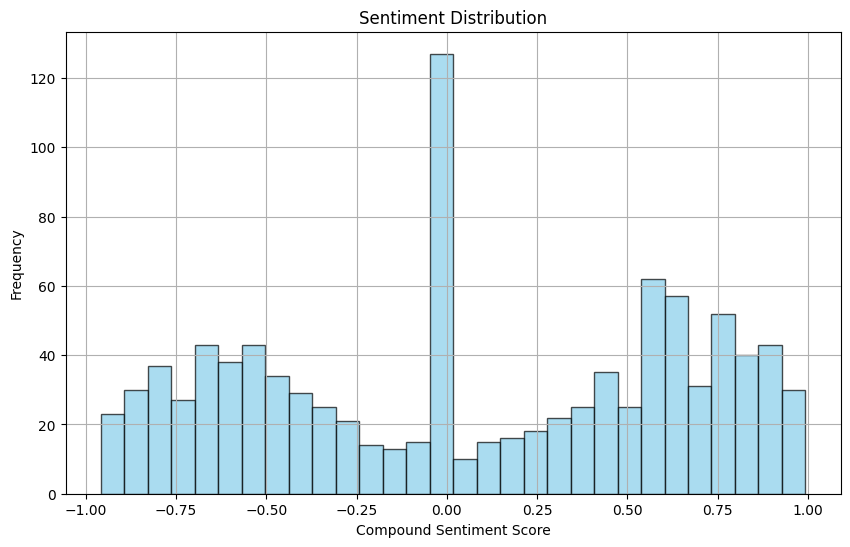

In [10]:
sid = SentimentIntensityAnalyzer()
df['Compound'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

plt.figure(figsize=(10, 6))
df['Compound'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

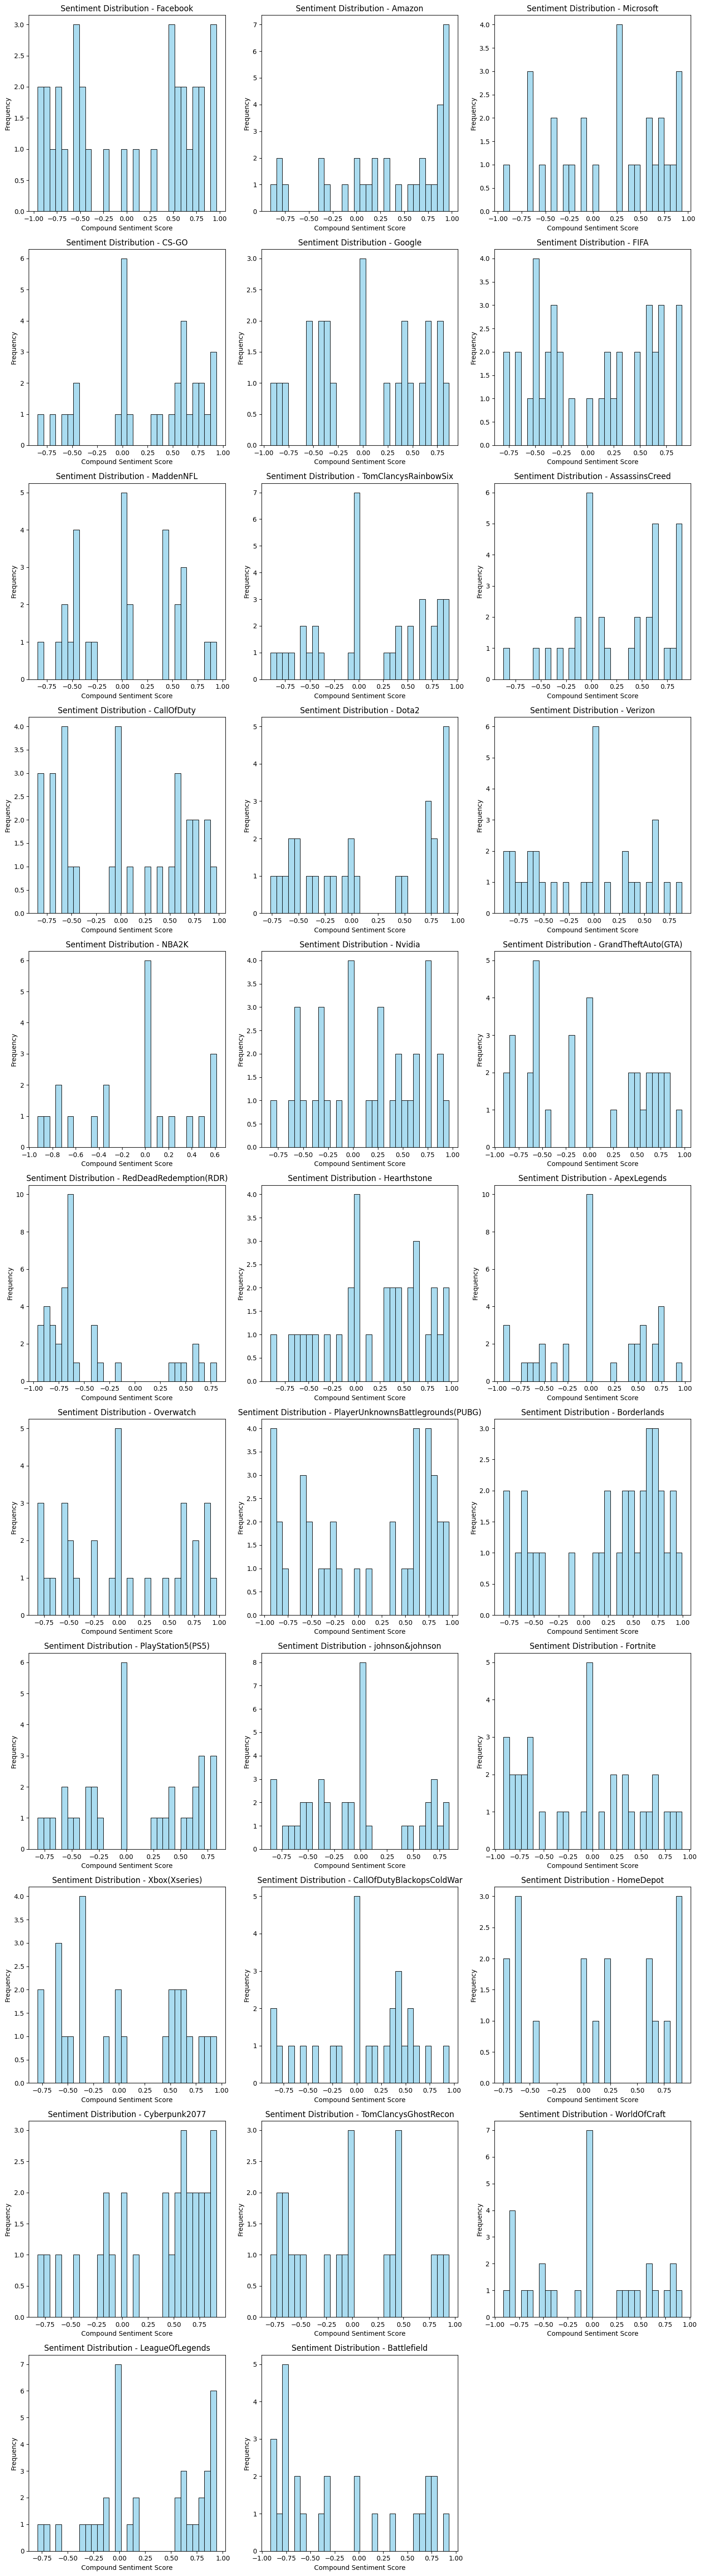

In [13]:
sid = SentimentIntensityAnalyzer()

unique_apps = df['Application'].unique()
num_apps = len(unique_apps)

num_rows = int((num_apps + 2) / 3)
num_cols = min(3, num_apps)

plt.figure(figsize=(15, num_rows * 5))

for i, app in enumerate(unique_apps, start=1):
    plt.subplot(num_rows, num_cols, i)
    app_df = df[df['Application'] == app].copy()
    app_df['Compound'] = app_df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])
    
    sns.histplot(app_df['Compound'], bins=30, kde=False, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Sentiment Distribution - {app}')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()